## World Happiness (2015-2017) Data Analysis

In [0]:
# dataset link : https://www.kaggle.com/unsdsn/world-happiness

from google.colab import files
uploaded = files.upload()

Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv


### Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Exploration

In [0]:
happiness_2015 = pd.read_csv('2015.csv')
happiness_2016 = pd.read_csv('2016.csv')
happiness_2017 = pd.read_csv('2017.csv')

In [0]:
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [0]:
happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [0]:
happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
# checking 2015 dataset info
happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [0]:
# checking 2015 dataset info
happiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [0]:
# checking 2017 dataset info
happiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

**Observations :** 
- We can observe that 2017 dataset doesn't contain "Region" Column 
- Column names are not formatted correctly
- None of the dataset have "NA" values.


### Adding "Region" Column in happiness_2017 dataset using happiness_2015 dataset

In [0]:
countries = happiness_2015.Country.unique() 
country_region = {}
for country in countries:
  country_region[country] = happiness_2015[happiness_2015.Country == country]["Region"].to_string()[3:].strip()



In [0]:
happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
country_reg_df = pd.DataFrame(list(country_region.items()), columns=["Country", "Region"])
country_reg_df.head()

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [0]:
happiness_2017 = pd.merge(happiness_2017, country_reg_df)

In [0]:
# adding "Year" column 
happiness_2015["Year"] = ['2015'] * happiness_2015.shape[0]
happiness_2016["Year"] = ['2016'] * happiness_2016.shape[0]
happiness_2017["Year"] = ['2017'] * happiness_2017.shape[0]


In [0]:
happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe,2017


### Changing Column Names of DataFrame


In [0]:
# dropping columns that we are not going to use
happiness_2015 = happiness_2015.drop("Standard Error", axis=1)
happiness_2016 = happiness_2016.drop(["Lower Confidence Interval", "Upper Confidence Interval"], axis=1)
happiness_2017 = happiness_2017.drop(["Whisker.high", "Whisker.low"], axis= 1)

In [0]:
happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [0]:
# reordering columns in 2017 dataset
cols_reorder= ['Country', 'Region','Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Year']
happiness_2017 = happiness_2017[cols_reorder]

# changing column names 
new_col_names = ['country', 'region', 'happiness_rank', 'happiness_score',
       'economy', 'family', 'health',
       'freedom', 'trust', 'generosity',
       'dystopia_residual', 'year']

happiness_2015.columns= new_col_names
happiness_2016.columns= new_col_names
happiness_2017.columns= new_col_names


### Concatenating all three dataset

In [0]:
combined_happiness = pd.concat([happiness_2015, happiness_2016, happiness_2017], ignore_index  = True)
combined_happiness.head()

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


# Data Analysis Tasks :

### Task 1 : Countries with a happiness score of less than 5.0

In [0]:
hs_lt_5_2015 = happiness_2015[happiness_2015.happiness_score < 5.0].loc[:, ["country", "happiness_score"]]
hs_lt_5_2015.head()

,country,happiness_score
93,Mozambique,4.971
94,Albania,4.959
95,Bosnia and Herzegovina,4.949
96,Lesotho,4.898
97,Dominican Republic,4.885


In [0]:
print("No. of counties with happiness score less than 5.0 in 2015 are :", hs_lt_5_2015.shape[0])
print("----------------------------------------------------------------------------------------------------")
print("List of names of countries with happiness score less than 5.0 in 2015\n", hs_lt_5_2015.country.unique())

No. of counties with happiness score less than 5.0 in 2015 are : 65
----------------------------------------------------------------------------------------------------
List of names of countries with happiness score less than 5.0 in 2015
 ['Mozambique' 'Albania' 'Bosnia and Herzegovina' 'Lesotho'
 'Dominican Republic' 'Laos' 'Mongolia' 'Swaziland' 'Greece' 'Lebanon'
 'Hungary' 'Honduras' 'Tajikistan' 'Tunisia' 'Palestinian Territories'
 'Bangladesh' 'Iran' 'Ukraine' 'Iraq' 'South Africa' 'Ghana' 'Zimbabwe'
 'Liberia' 'India' 'Sudan' 'Haiti' 'Congo (Kinshasa)' 'Nepal' 'Ethiopia'
 'Sierra Leone' 'Mauritania' 'Kenya' 'Djibouti' 'Armenia' 'Botswana'
 'Myanmar' 'Georgia' 'Malawi' 'Sri Lanka' 'Cameroon' 'Bulgaria' 'Egypt'
 'Yemen' 'Angola' 'Mali' 'Congo (Brazzaville)' 'Comoros' 'Uganda'
 'Senegal' 'Gabon' 'Niger' 'Cambodia' 'Tanzania' 'Madagascar'
 'Central African Republic' 'Chad' 'Guinea' 'Ivory Coast' 'Burkina Faso'
 'Afghanistan' 'Rwanda' 'Benin' 'Syria' 'Burundi' 'Togo']


We can see that there are 65 countries whose happiness score is less than 5.0 in year 2015

In [0]:
hs_lt_5_2016 = happiness_2016[happiness_2016.happiness_score < 5.0].loc[:, ["country", "happiness_score"]]
hs_lt_5_2016.head()

,country,happiness_score
99,Tajikistan,4.996
100,Mongolia,4.907
101,Laos,4.876
102,Nigeria,4.875
103,Honduras,4.871


In [0]:
print("No. of counties with happiness score less than 5.0 in 2016 are :", hs_lt_5_2016.shape[0])
print("----------------------------------------------------------------------------------------------------")
print("List of names of countries with happiness score less than 5.0 in 2016\n", hs_lt_5_2016.country.unique())

No. of counties with happiness score less than 5.0 in 2016 are : 58
----------------------------------------------------------------------------------------------------
List of names of countries with happiness score less than 5.0 in 2016
 ['Tajikistan' 'Mongolia' 'Laos' 'Nigeria' 'Honduras' 'Iran' 'Zambia'
 'Nepal' 'Palestinian Territories' 'Albania' 'Bangladesh' 'Sierra Leone'
 'Iraq' 'Namibia' 'Cameroon' 'Ethiopia' 'South Africa' 'Sri Lanka' 'India'
 'Myanmar' 'Egypt' 'Armenia' 'Kenya' 'Ukraine' 'Ghana' 'Congo (Kinshasa)'
 'Georgia' 'Congo (Brazzaville)' 'Senegal' 'Bulgaria' 'Mauritania'
 'Zimbabwe' 'Malawi' 'Sudan' 'Gabon' 'Mali' 'Haiti' 'Botswana' 'Comoros'
 'Ivory Coast' 'Cambodia' 'Angola' 'Niger' 'South Sudan' 'Chad'
 'Burkina Faso' 'Uganda' 'Yemen' 'Madagascar' 'Tanzania' 'Liberia'
 'Guinea' 'Rwanda' 'Benin' 'Afghanistan' 'Togo' 'Syria' 'Burundi']


In [0]:
hs_lt_5_2017 = happiness_2017[happiness_2017.happiness_score < 5.0].loc[:, ["country", "happiness_score"]]
hs_lt_5_2017.head()

,country,happiness_score
94,Nepal,4.962
95,Mongolia,4.955
96,South Africa,4.829
97,Tunisia,4.805
98,Palestinian Territories,4.775


In [0]:
print("No. of counties with happiness score less than 5.0 in 2017 are :", hs_lt_5_2017.shape[0])
print("----------------------------------------------------------------------------------------------------")
print("List of names of countries with happiness score less than 5.0 in 2017\n", hs_lt_5_2017.country.unique())

No. of counties with happiness score less than 5.0 in 2017 are : 55
----------------------------------------------------------------------------------------------------
List of names of countries with happiness score less than 5.0 in 2017
 ['Nepal' 'Mongolia' 'South Africa' 'Tunisia' 'Palestinian Territories'
 'Egypt' 'Bulgaria' 'Sierra Leone' 'Cameroon' 'Iran' 'Albania'
 'Bangladesh' 'Kenya' 'Mozambique' 'Myanmar' 'Senegal' 'Zambia' 'Iraq'
 'Gabon' 'Ethiopia' 'Sri Lanka' 'Armenia' 'India' 'Mauritania'
 'Congo (Brazzaville)' 'Georgia' 'Congo (Kinshasa)' 'Mali' 'Ivory Coast'
 'Cambodia' 'Sudan' 'Ghana' 'Ukraine' 'Uganda' 'Burkina Faso' 'Niger'
 'Malawi' 'Chad' 'Zimbabwe' 'Lesotho' 'Angola' 'Afghanistan' 'Botswana'
 'Benin' 'Madagascar' 'Haiti' 'Yemen' 'Liberia' 'Guinea' 'Togo' 'Rwanda'
 'Syria' 'Tanzania' 'Burundi' 'Central African Republic']


By using similar technique, we can observe that there are 58 coutries in year 2016 and 55 countries in year 2017 whose happiness score value is less than 5.0

### Task 2 : Which is the unhappiest country in Sub-Saharan Africa?

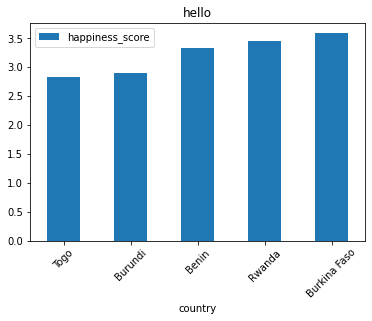

In [0]:
sub_saharan_africa_2015 = happiness_2015[happiness_2015.region == "Sub-Saharan Africa"].sort_values(by=["happiness_score"]).head().loc[:, ["country" , "happiness_score"]]
sub_saharan_africa_2015.plot(x = "country", y = "happiness_score", kind = "bar", title="hello", rot=45)

In [0]:
happiness_2015[happiness_2015.region == "Sub-Saharan Africa"].sort_values(by=["happiness_score"]).head(1)

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,year
157,Togo,Sub-Saharan Africa,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015


In 2015, the unhappiest country in Sub-Saharan Africa was **Togo**

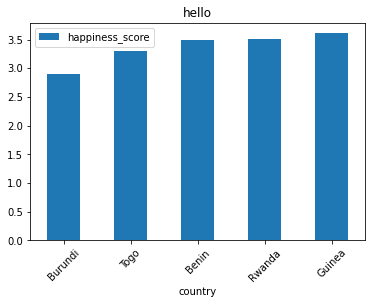

In [0]:
sub_saharan_africa_2016 = happiness_2016[happiness_2016.region == "Sub-Saharan Africa"].sort_values(by=["happiness_score"]).head().loc[:, ["country" , "happiness_score"]]
sub_saharan_africa_2016.plot(x = "country", y = "happiness_score", kind = "bar", title="hello", rot=45)

In [0]:
happiness_2016[happiness_2016.region == "Sub-Saharan Africa"].sort_values(by=["happiness_score"]).head(1)

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,year
156,Burundi,Sub-Saharan Africa,157,2.905,0.06831,0.23442,0.15747,0.0432,0.09419,0.2029,2.10404,2016


In 2016, the unhappiest country in Sub-Saharan Africa was **Burundi**

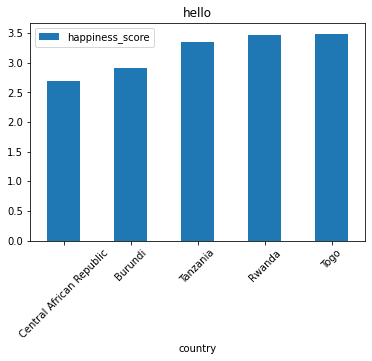

In [0]:
sub_saharan_africa_2017 = happiness_2017[happiness_2017.region == "Sub-Saharan Africa"].sort_values(by=["happiness_score"]).head().loc[:, ["country" , "happiness_score"]]
sub_saharan_africa_2017.plot(x = "country", y = "happiness_score", kind = "bar", title="hello", rot=45)

In [0]:
happiness_2017[happiness_2017.region == "Sub-Saharan Africa"].sort_values(by=["happiness_score"]).head(1)

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,year
148,Central African Republic,Sub-Saharan Africa,155,2.693,0.0,0.0,0.018773,0.270842,0.280876,0.056565,2.066005,2017


In 2017, the unhappiest country in Sub-Sharan Africa was **Central African Republic**

### Task 3 : Compare the Unhappiest and happiest countries in each region

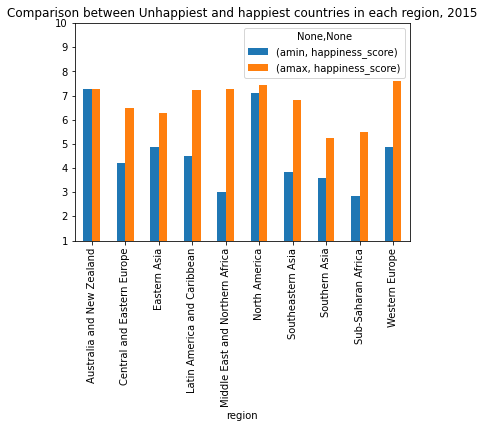

In [0]:
score_2015 = happiness_2015.pivot_table(values= "happiness_score", index = "region", aggfunc=[np.min, np.max])
score_2015.plot(kind = 'bar', title = "Comparison between Unhappiest and happiest countries in each region, 2015", ylim = (1,10))

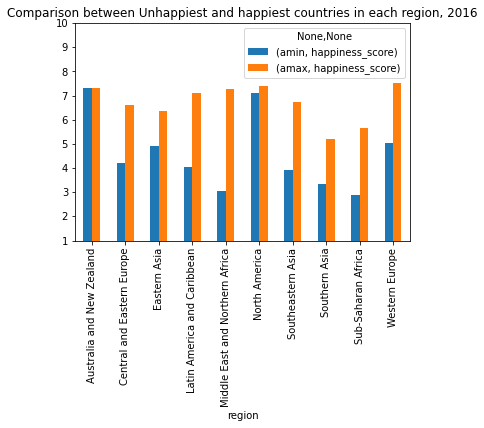

In [0]:
score_2016 = happiness_2016.pivot_table(values= "happiness_score", index = "region", aggfunc=[np.min, np.max])
score_2016.plot(kind = 'bar', title = "Comparison between Unhappiest and happiest countries in each region, 2016", ylim = (1,10))

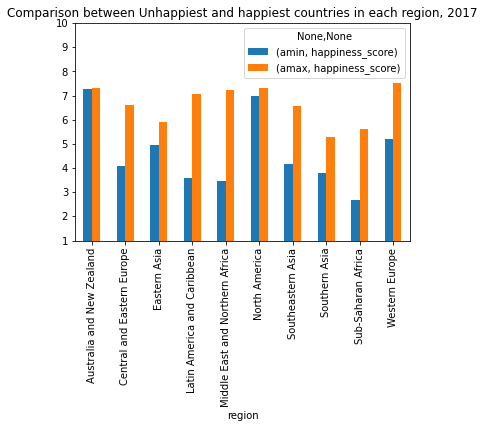

In [0]:
score_2017 = happiness_2017.pivot_table(values= "happiness_score", index = "region", aggfunc=[np.min, np.max])
score_2017.plot(kind = 'bar', title = "Comparison between Unhappiest and happiest countries in each region, 2017", ylim = (1,10))

### Task 4 : Countries that became unhappy between 2015 to 2017

In [0]:
combined_pivot_df = combined_happiness.pivot_table(index = 'year', values='happiness_score', aggfunc=np.mean)
combined_pivot_df.head()

,happiness_score
year,
2015,5.375734
2016,5.382185
2017,5.360450


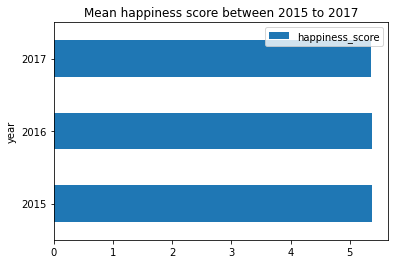

In [0]:
combined_pivot_df.plot(kind='barh', title="Mean happiness score between 2015 to 2017")

As we can clearly observe from the above chart that happiness score of all three years are same.

In [0]:
two_column_2015 = happiness_2015[['country', 'happiness_score']]
two_column_2017 = happiness_2017[['country', 'happiness_score']]
combined_2015_17 = pd.merge(left = two_column_2015, right=two_column_2017, how='left', on='country')
combined_2015_17.head()

,country,happiness_score_x,happiness_score_y
0,Switzerland,7.587,7.494
1,Iceland,7.561,7.504
2,Denmark,7.527,7.522
3,Norway,7.522,7.537
4,Canada,7.427,7.316


In [0]:
decreased_happiness = combined_2015_17[combined_2015_17['happiness_score_x'] > combined_2015_17['happiness_score_y']]
decreased_happiness.head()

,country,happiness_score_x,happiness_score_y
0,Switzerland,7.587,7.494
1,Iceland,7.561,7.504
2,Denmark,7.527,7.522
4,Canada,7.427,7.316
6,Netherlands,7.378,7.377


In [0]:
print('No. of countries that became unhappy from 2015 to 2017 are : ', decreased_happiness.shape[0])
print("----------------------------------------------------------------------------------------------------------------")
print('Countries Names : \n', decreased_happiness.country.unique())

No. of countries that became unhappy from 2015 to 2017 are :  75
----------------------------------------------------------------------------------------------------------------
Countries Names : 
 ['Switzerland' 'Iceland' 'Denmark' 'Canada' 'Netherlands' 'Sweden'
 'Australia' 'Israel' 'Costa Rica' 'Austria' 'Mexico' 'United States'
 'Brazil' 'Luxembourg' 'Belgium' 'United Arab Emirates' 'United Kingdom'
 'Venezuela' 'Singapore' 'Panama' 'Chile' 'Qatar' 'France' 'Uruguay'
 'Colombia' 'Thailand' 'Saudi Arabia' 'Kuwait' 'El Salvador' 'Uzbekistan'
 'Japan' 'South Korea' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan'
 'Slovenia' 'Peru' 'Belarus' 'Croatia' 'Libya' 'Jamaica' 'Cyprus' 'Kosovo'
 'Indonesia' 'Vietnam' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Zambia'
 'Mozambique' 'Albania' 'Lesotho' 'Bangladesh' 'Ukraine' 'Iraq' 'Ghana'
 'Zimbabwe' 'Liberia' 'India' 'Sudan' 'Haiti' 'Congo (Kinshasa)'
 'Ethiopia' 'Mauritania' 'Botswana' 'Georgia' 'Malawi' 'Yemen' 'Angola'
 'Tanzania' 'Madagascar' 'Central 

We can see that there are 75 countries that became unhappy from year 2015 to 2017.

### Task 5 : Find the country whose happiness decreased by the most amount

In [0]:
dec_happiness = decreased_happiness.copy()
dec_happiness['happiness_decreased_amt'] = decreased_happiness.loc[:,'happiness_score_x'] - decreased_happiness.loc[:,'happiness_score_y']
dec_happiness.head() 

dec_happiness.sort_values(by='happiness_decreased_amt', ascending=False).head(1)

,country,happiness_score_x,happiness_score_y,happiness_decreased_amt
22,Venezuela,6.81,5.25,1.56


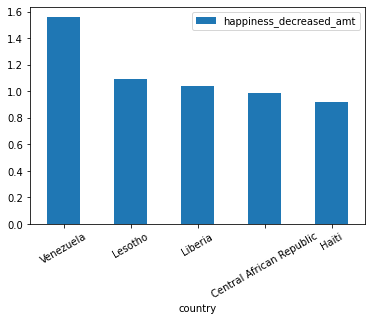

In [0]:
df  = dec_happiness.sort_values(by='happiness_decreased_amt', ascending=False).head()[['country', 'happiness_decreased_amt']]
df.plot(kind='bar', x='country', y = 'happiness_decreased_amt', rot=30)

As we can clearly see in the above result, **Venezuela** is the country whose happiness decreased by the most amount i.e by 1.56